<a href="https://colab.research.google.com/github/iwatake2222/colaboratory_study/blob/master/mmdet/mmdet_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MMDetectionのインストール

## MMDetectionのインストール

In [34]:
import torch
print(torch.__version__)
device = "cuda" if torch.cuda.is_available() else "cpu"
print("device = ", device)

1.5.0+cu101
device =  cuda


In [14]:
HOME_PATH = "/content"
%cd "$HOME_PATH"
!git clone https://github.com/open-mmlab/mmdetection.git
%cd mmdetection
!pip install -r requirements/build.txt
!pip install "git+https://github.com/open-mmlab/cocoapi.git#subdirectory=pycocotools"
!pip install -v -e .  # or "python setup.py develop"

/content
Cloning into 'mmdetection'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 11215 (delta 1), reused 1 (delta 1), pack-reused 11208
Receiving objects: 100% (11215/11215), 9.15 MiB | 10.94 MiB/s, done.
Resolving deltas: 100% (7578/7578), done.
/content/mmdetection
  Cloning https://github.com/open-mmlab/cocoapi.git to /tmp/pip-req-build-mzt75ben
  Running command git clone -q https://github.com/open-mmlab/cocoapi.git /tmp/pip-req-build-mzt75ben
  Created wheel for pycocotools: filename=pycocotools-12.0-cp36-cp36m-linux_x86_64.whl size=267275 sha256=ad8086a60c3f207cf034fd2997707fa1d6190d62c4393ac249b2ca10533facb1
  Stored in directory: /tmp/pip-ephem-wheel-cache-95udi25_/wheels/cd/f6/de/018ccc2d175046c612e93b42a169cd1ab7563d61581cfba8df
Successfully built pycocotools
  Found existing installation: pycocotools 2.0.0
    Uninstalling pycocotools-2.0.0:
      Successfully uninstalled pyc

## 推論のテスト
### Pretrainedモデルの取得

In [33]:
!mkdir -p "$HOME_PATH"/mmdetection/checkpoints
%cd "$HOME_PATH"/mmdetection/checkpoints
!wget https://open-mmlab.s3.ap-northeast-2.amazonaws.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth

/content/mmdetection/checkpoints
--2020-06-20 06:50:32--  https://open-mmlab.s3.ap-northeast-2.amazonaws.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth
Resolving open-mmlab.s3.ap-northeast-2.amazonaws.com (open-mmlab.s3.ap-northeast-2.amazonaws.com)... 52.219.60.119
Connecting to open-mmlab.s3.ap-northeast-2.amazonaws.com (open-mmlab.s3.ap-northeast-2.amazonaws.com)|52.219.60.119|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 167287506 (160M) [application/x-www-form-urlencoded]
Saving to: ‘faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth.1’

faster_rcnn_r50_fpn 100%[===================>] 159.54M  11.6MB/s    in 16s     

2020-06-20 06:50:49 (10.1 MB/s) - ‘faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth.1’ saved [167287506/167287506]



### デモコードの実行

/content/mmdetection


/content/mmdetection/mmdet/apis/inference.py:98: UserWarning: We set use_torchvision=True in CPU mode.
  warnings.warn('We set use_torchvision=True in CPU mode.')
/content/mmdetection/mmdet/models/detectors/base.py:322: UserWarning: show==False and out_file is not specified, only result image will be returned
  warnings.warn('show==False and out_file is not specified, only '


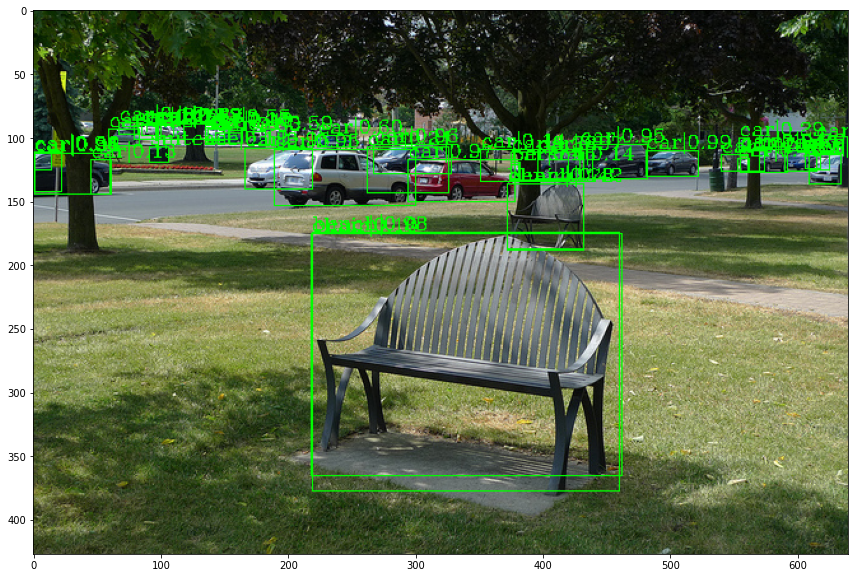

In [32]:
%cd "$HOME_PATH"/mmdetection
from argparse import ArgumentParser
from mmdet.apis import inference_detector, init_detector, show_result_pyplot
model = init_detector("configs/faster_rcnn/faster_rcnn_r50_fpn_1x_coco.py", "checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth", device="cpu")
result = inference_detector(model, "demo/demo.jpg")
show_result_pyplot(model, "demo/demo.jpg", result, score_thr=0.1)

# COCO データセットを使って学習

## ダウンロード

In [ ]:
from google.colab import drive 
drive.mount("/content/drive")

In [3]:
HOME_PATH = "/content"
DATASET_PATH = "/content/drive/My Drive/data/coco"
!mkdir -p "$DATASET_PATH"
%cd "$DATASET_PATH"

In [ ]:
!wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip
!wget http://images.cocodataset.org/zips/train2017.zip
!wget http://images.cocodataset.org/zips/val2017.zip
!wget http://images.cocodataset.org/zips/test2017.zip

ダウンロードしたファイルは一度colab上に配置され、その後Googleドライブに移動されるっぽい?


zipファイルがGoogleドライブに移動されるのを待つ。
さもないと、容量オーバーになってしまう。また、unzipも失敗する。

解凍は1ファイルずつ。
train2017.zipは何回も失敗するので-nオプションを付けてリトライする。

In [ ]:
# !unzip -n annotations_trainval2017.zip
!unzip -n train2017.zip
# !unzip -n val2017.zip
# !unzip -n test2017.zip

In [10]:
!ls
!ls -1 train2017 | wc -l
!ls -1 val2017 | wc -l
!ls -1 test2017 | wc -l

annotations		      test2017.txt	train2017.txt	val2017.txt
annotations_trainval2017.zip  test2017.zip	train2017.zip	val2017.zip
test2017		      train2017		val2017
test2017_ls.txt		      train2017_ls.txt	val2017_ls.txt
118287
5000
40670


In [9]:
!unzip -Z train2017.zip > train2017.txt
!ls train2017 > train2017_ls.txt
!unzip -Z val2017.zip > val2017.txt
!ls val2017 > val2017_ls.txt
!unzip -Z test2017.zip > test2017.txt
!ls test2017 > test2017_ls.txt

## データセットの場所の設定

In [4]:
%cd "$HOME_PATH"/mmdetection
!mkdir -p data
!ln -s "$DATASET_PATH"  data/coco

/content/mmdetection


## Pretrainedモデルで推論テスト

In [35]:
!mkdir -p "$HOME_PATH"/result_images
%cd "$HOME_PATH"/mmdetection
!python tools/test.py \
    configs/faster_rcnn/faster_rcnn_r50_fpn_1x_coco.py \
    checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth \
    --show-dir "$HOME_PATH"/result_images

/content/mmdetection
/usr/local/lib/python3.6/dist-packages/mmcv/utils/registry.py:64: UserWarning: The old API of register_module(module, force=False) is deprecated and will be removed, please use the new API register_module(name=None, force=False, module=None) instead.
  'The old API of register_module(module, force=False) '
loading annotations into memory...
Done (t=0.49s)
creating index...
index created!
[  ] 18/5000, 5.4 task/s, elapsed: 3s, ETA:   917sTraceback (most recent call last):
  File "tools/test.py", line 149, in <module>
    main()
  File "tools/test.py", line 127, in main
    args.show_score_thr)
  File "/content/mmdetection/mmdet/apis/test.py", line 39, in single_gpu_test
    img_show = mmcv.imresize(img_show, (ori_w, ori_h))
  File "/usr/local/lib/python3.6/dist-packages/mmcv/image/geometric.py", line 50, in imresize
    img, size, dst=out, interpolation=interp_codes[interpolation])
KeyboardInterrupt


## 学習

In [17]:
!mkdir -p "$HOME_PATH"/work_train
%cd "$HOME_PATH"/mmdetection
!python tools/train.py \
    configs/faster_rcnn/faster_rcnn_r50_fpn_1x_coco.py \
    --work-dir "$HOME_PATH"/work_train

/content/mmdetection
/usr/local/lib/python3.6/dist-packages/mmcv/utils/registry.py:64: UserWarning: The old API of register_module(module, force=False) is deprecated and will be removed, please use the new API register_module(name=None, force=False, module=None) instead.
  'The old API of register_module(module, force=False) '
2020-06-20 06:01:23,471 - mmdet - INFO - Environment info:
------------------------------------------------------------
sys.platform: linux
Python: 3.6.9 (default, Apr 18 2020, 01:56:04) [GCC 8.4.0]
CUDA available: True
CUDA_HOME: /usr/local/cuda
NVCC: Cuda compilation tools, release 10.1, V10.1.243
GPU 0: Tesla P4
GCC: gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
PyTorch: 1.5.0+cu101
PyTorch compiling details: PyTorch built with:
  - GCC 7.3
  - C++ Version: 201402
  - Intel(R) Math Kernel Library Version 2019.0.5 Product Build 20190808 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v0.21.1 (Git Hash 7d2fd500bc78936d1d648ca713b901012f470dbc)
  - OpenM

## ONNXへモデル変換

In [19]:
!pip install onnx

     |████████████████████████████████| 7.4MB 5.7MB/s 


In [22]:
%cd "$HOME_PATH"/mmdetection
!python tools/pytorch2onnx.py \
    configs/faster_rcnn/faster_rcnn_r50_fpn_1x_coco.py \
    checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth \
    --out faster_rcnn_r50_fpn_1x_coco.onnx

/content/mmdetection
/usr/local/lib/python3.6/dist-packages/mmcv/utils/registry.py:64: UserWarning: The old API of register_module(module, force=False) is deprecated and will be removed, please use the new API register_module(name=None, force=False, module=None) instead.
  'The old API of register_module(module, force=False) '
/usr/local/lib/python3.6/dist-packages/torch/onnx/utils.py:209: UserWarning: `add_node_names' can be set to True only when 'operator_export_type' is `ONNX`. Since 'operator_export_type' is not set to 'ONNX', `add_node_names` argument will be ignored.
  "`{}` argument will be ignored.".format(arg_name, arg_name))
/usr/local/lib/python3.6/dist-packages/torch/onnx/utils.py:209: UserWarning: `do_constant_folding' can be set to True only when 'operator_export_type' is `ONNX`. Since 'operator_export_type' is not set to 'ONNX', `do_constant_folding` argument will be ignored.
  "`{}` argument will be ignored.".format(arg_name, arg_name))
/content/mmdetection/mmdet/core/b

In [24]:
!cp faster_rcnn_r50_fpn_1x_coco.onnx "/content/drive/My Drive/."